In [46]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

import imagehash
import seaborn as sns

import tqdm
from tqdm.auto import tqdm as tqdmp
tqdmp.pandas()

import cv2, os
import skimage.io as io
from PIL import Image

def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()


C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [53]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
      

In [23]:
dfTrain      = pd.read_csv('./data/train.csv')
dfTest       = pd.read_csv('./data/test.csv')
dfSubmission = pd.read_csv('./data/sample_submission.csv', index_col = 0)
print('-'*40, 'Train head', '-'*40)
print(dfTrain.head())
print('-'*40, 'Test head', '-'*40)
print(dfTest.head())
print('-'*30, 'Sample submission head', '-'*30)
print(dfSubmission.head())

display('dfTrain','dfTest')

---------------------------------------- Train head ----------------------------------------
         posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069  
------------------------

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069
...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013


In [24]:
WORK_DIR = './data'
os.listdir(WORK_DIR)

['sample_submission.csv',
 'shopee-product-matching.zip',
 'test.csv',
 'test_images',
 'train.csv',
 'train_images']

In [25]:
print('Train images: %d' %len(os.listdir(os.path.join(WORK_DIR, "train_images"))))
print('Test images: %d' %len(os.listdir(os.path.join(WORK_DIR, "test_images"))))

Train images: 32412
Test images: 3


In [26]:
dfTrain['path'] = WORK_DIR + "/train_images/" + dfTrain['image']
dfTest['path']  = WORK_DIR + "/test_images/"  + dfTest['image']
dfTrain.head()

,posting_id,image,image_phash,title,label_group,path
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,./data/train_images/0000a68812bc7e98c42888dfb1...
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,./data/train_images/00039780dfc94d01db8676fe78...
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,./data/train_images/000a190fdd715a2a36faed16e2...
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,./data/train_images/00117e4fc239b1b641ff08340b...
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,./data/train_images/00136d1cf4edede0203f32f05f...


In [27]:
print('label_group unique values: {}'.format(dfTrain['label_group'].nunique()))

label_group unique values: 11014


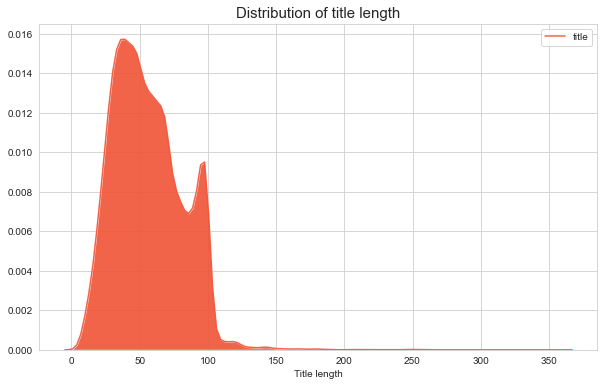

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 6))
plt.title('Distribution of title length', fontsize = '15')
sns.kdeplot(dfTrain['title'].apply(lambda x: len(x)),shade=True,
            color = '#f15335',alpha = 0.9)
plt.xlabel('Title length')
plt.show()

In [38]:
# Shape columns
dfTrain['img_shape'] = dfTrain['path'].progress_apply(lambda x: np.shape(io.imread(x)))


In [39]:
dfTrain.head()

,posting_id,image,image_phash,title,label_group,path,img_shape
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,./data/train_images/0000a68812bc7e98c42888dfb1...,"(1024, 1024, 3)"
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,./data/train_images/00039780dfc94d01db8676fe78...,"(1000, 1000, 3)"
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,./data/train_images/000a190fdd715a2a36faed16e2...,"(640, 640, 3)"
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,./data/train_images/00117e4fc239b1b641ff08340b...,"(640, 640, 3)"
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,./data/train_images/00136d1cf4edede0203f32f05f...,"(756, 756, 3)"


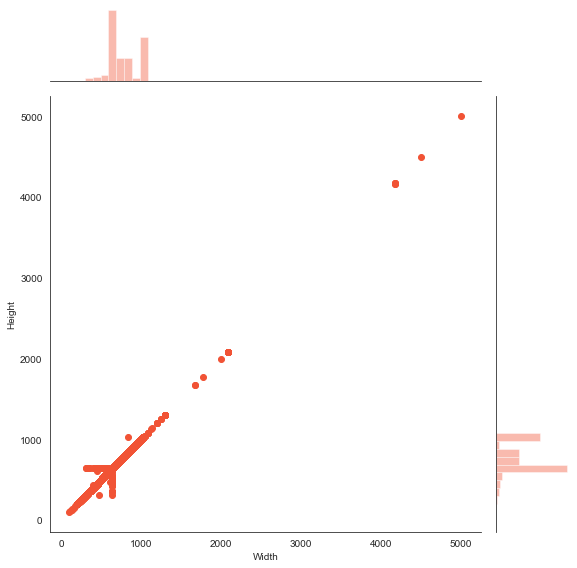

In [41]:
shapes = pd.DataFrame().from_records(dfTrain['img_shape'])
shapes.columns = ['Width', 'Height', 'Colors']

sns.set_style("white")
sns.jointplot(x = shapes.iloc[:, 0].astype('float32'), 
              y = shapes.iloc[:, 1].astype('float32'),
              height = 8, color = '#f15335')
plt.show()

In [52]:
dfTrain.loc[0,'img_shape']

(1024, 1024, 3)

In [50]:
dfTrain['image_phash'][0]

'94974f937d4c2433'

In [43]:
imagehash.hex_to_hash(dfTrain['image_phash'][0])

array([[ True, False, False,  True, False,  True, False, False],
       [ True, False, False,  True, False,  True,  True,  True],
       [False,  True, False, False,  True,  True,  True,  True],
       [ True, False, False,  True, False, False,  True,  True],
       [False,  True,  True,  True,  True,  True, False,  True],
       [False,  True, False, False,  True,  True, False, False],
       [False, False,  True, False, False,  True, False, False],
       [False, False,  True,  True, False, False,  True,  True]])

In [54]:
def match_matrix(phash_array):
    """
    A function that checks for matches by phash value.
    Takes phash values as input.
    Output - phash diff matrix (pandas data frame)
    """
    
#      i ='94974f937d4c2433'
    phashs = phash_array.apply(lambda x: imagehash.hex_to_hash(x))
    phash_matrix = pd.DataFrame()
    pbar = tqdm.tqdm(total = len(phash_array), desc = 'Progress', position = 0, leave = True)
    
    for idx, i in enumerate(phash_array):
        pbar.update(1)
        phash_matrix = pd.concat([phash_matrix, phashs - imagehash.hex_to_hash(i)], 
                                 axis = 1)
    pbar.close()
    phash_matrix.columns = range(len(phash_array))
    return phash_matrix

In [66]:
imagehash.hex_to_hash(dfTrain_part['image_phash'][0])

array([[ True, False, False,  True, False,  True, False, False],
       [ True, False, False,  True, False,  True,  True,  True],
       [False,  True, False, False,  True,  True,  True,  True],
       [ True, False, False,  True, False, False,  True,  True],
       [False,  True,  True,  True,  True,  True, False,  True],
       [False,  True, False, False,  True,  True, False, False],
       [False, False,  True, False, False,  True, False, False],
       [False, False,  True,  True, False, False,  True,  True]])

In [55]:
dfTrain_part = dfTrain.iloc[:1000, :]
matches = match_matrix(dfTrain_part['image_phash'])
matches

Progress: 100%|███████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 104.08it/s]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0,42,40,30,32,34,32,30,38,36,38,34,34,26,32,32,40,30,42,34,30,34,34,38,34,30,32,36,38,38,36,34,32,32,36,28,22,32,34,30,32,24,24,32,34,38,32,26,26,32,...,32,32,36,30,28,40,22,36,34,34,38,32,38,26,36,36,34,38,30,26,30,30,32,34,36,30,28,30,26,34,26,32,26,34,42,30,36,34,34,32,26,28,34,32,26,28,42,34,26,26
1,42,0,28,28,34,32,36,24,28,32,28,32,32,38,32,30,30,32,20,30,28,30,34,30,34,34,34,26,20,20,30,30,26,36,24,34,38,34,30,32,28,36,30,36,28,22,28,28,30,32,...,32,30,28,34,30,26,38,26,34,32,26,32,24,34,22,36,28,28,28,26,32,32,32,36,30,30,32,24,36,34,32,24,46,28,32,38,26,30,34,34,32,28,30,28,42,32,30,32,32,34
2,40,28,0,34,44,26,34,32,28,32,20,32,32,30,34,26,28,32,24,36,30,28,36,22,30,24,34,34,32,32,36,28,28,32,26,38,30,36,34,30,32,28,34,32,36,28,30,34,36,32,...,32,32,28,32,28,30,36,36,36,34,30,34,22,40,30,28,34,32,26,40,32,30,30,32,28,28,26,34,34,30,24,28,30,24,32,30,24,30,32,36,34,42,30,30,32,36,24,32,30,24
3,30,28,34,0,34,40,30,32,34,30,36,36,36,36,34,34,32,32,28,32,26,30,28,32,30,34,32,28,30,30,36,36,28,26,36,36,36,30,30,32,32,28,32,34,30,28,32,36,30,32,...,32,32,28,36,34,36,36,34,34,36,38,28,28,32,28,40,34,34,30,30,40,28,32,36,36,38,30,32,34,32,32,28,32,34,30,38,32,32,32,28,28,34,38,32,38,28,38,28,30,30
4,32,34,44,34,0,32,30,30,36,30,38,34,34,32,32,36,34,28,36,30,32,32,32,36,34,34,34,32,38,38,30,36,38,32,36,38,38,28,26,32,32,36,34,20,26,30,34,34,30,38,...,30,30,30,28,32,34,30,36,28,26,30,30,44,30,34,28,24,28,30,32,32,30,36,34,34,30,38,30,30,34,40,40,28,36,26,32,36,34,34,26,36,22,28,32,26,24,36,34,32,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,28,32,36,28,24,32,34,30,36,38,34,40,40,24,32,40,32,26,30,30,36,30,32,32,30,24,42,32,32,32,36,34,32,34,28,38,32,34,28,36,32,32,32,32,34,32,34,38,36,36,...,24,38,30,28,36,34,30,32,36,28,30,30,28,36,22,38,28,36,32,32,34,26,28,34,38,34,32,28,36,26,30,32,34,34,32,38,34,34,38,30,34,28,26,26,32,0,34,32,30,32
996,42,30,24,38,36,24,32,30,34,36,26,22,22,32,34,26,24,34,30,34,28,26,28,26,24,30,38,32,26,26,32,26,28,34,32,28,34,28,32,34,28,28,32,36,30,32,38,32,24,28,...,32,32,26,34,32,28,34,28,32,26,20,36,28,30,28,34,38,26,28,28,30,30,24,24,24,30,28,28,30,28,36,30,36,30,32,26,20,24,22,38,24,36,28,36,40,34,0,26,34,26
997,34,32,32,28,34,32,30,28,38,30,30,30,30,34,32,34,34,40,30,28,34,24,34,28,30,40,36,30,28,28,24,34,34,34,36,36,30,28,36,28,38,34,34,32,32,28,30,26,38,34,...,32,22,36,30,32,32,28,24,34,34,28,34,32,28,36,32,34,30,32,28,36,28,26,36,34,34,34,38,30,32,30,30,32,24,30,24,30,34,32,30,34,32,38,34,30,32,26,0,34,32
998,26,32,30,30,32,36,40,36,30,30,26,38,38,28,28,32,32,34,32,36,28,32,30,30,30,30,26,36,40,40,44,30,34,30,34,34,28,34,32,28,36,26,30,34,36,40,30,30,32,34,...,28,32,30,30,26,30,32,34,26,28,34,30,28,32,32,26,36,30,32,38,30,28,36,38,38,24,30,30,42,32,26,34,34,30,32,32,36,32,38,34,34,36,36,32,26,30,34,34,0,28


In [68]:
test_match = match_matrix(dfTest['image_phash'][:3])
test_match

Progress: 100%|█████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 749.34it/s]


,0,1,2
0,0,36,26
1,36,0,32
2,26,32,0


In [69]:
match = []
for i in range(len(matches)):
    match.append(matches.iloc[i, :][(matches.iloc[i, :] == 0)].index.values)
match = pd.Series(match)

match[match.apply(lambda x: len(x) > 1)]

11                 [11, 12]
12                 [11, 12]
28                 [28, 29]
29                 [28, 29]
56                 [56, 57]
57                 [56, 57]
58            [58, 59, 482]
59            [58, 59, 482]
98                 [98, 99]
99                 [98, 99]
104    [104, 105, 106, 107]
105    [104, 105, 106, 107]
106    [104, 105, 106, 107]
107    [104, 105, 106, 107]
108              [108, 109]
109              [108, 109]
119              [119, 120]
120              [119, 120]
132              [132, 990]
145              [145, 155]
150              [150, 151]
151              [150, 151]
155              [145, 155]
230         [230, 231, 232]
231         [230, 231, 232]
232         [230, 231, 232]
238              [238, 239]
239              [238, 239]
298         [298, 544, 545]
364              [364, 819]
367         [367, 368, 597]
368         [367, 368, 597]
379              [379, 380]
380              [379, 380]
404              [404, 405]
405              [40

In [71]:
def image_viz(image_path):
    """
    Function for visualization.
    Takes path to image as input.
    """
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    plt.imshow(img)
    plt.axis('off')

In [73]:
dfTrain_part.loc[[11,12],['posting_id','image_phash','title','label_group']]

,posting_id,image_phash,title,label_group
11,train_2496690777,eab5c295966ac368,PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH...,509010932
12,train_2771755203,eab5c295966ac368,PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH...,509010932


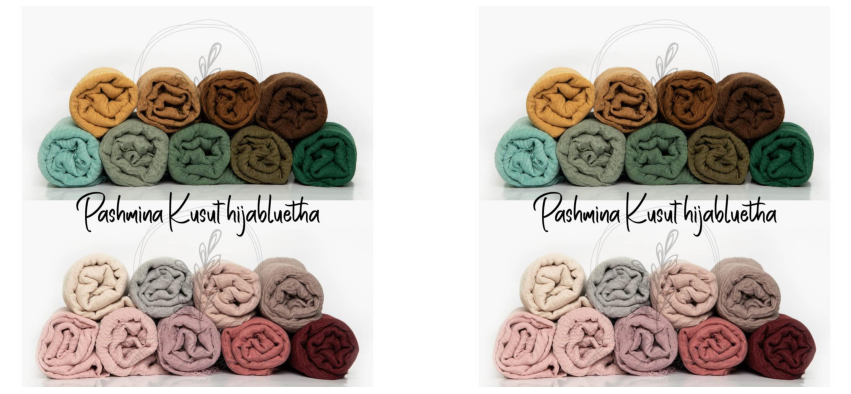

In [75]:
plt.figure(figsize = (15, 10))
for idx, i in enumerate([dfTrain_part.loc[11, 'path'], 
                         dfTrain_part.loc[12, 'path']]):
    plt.subplot(1, 2, idx + 1)
    image_viz(i)
plt.show()

In [ ]:
bbb

In [77]:
# Work functions
def phash_match(phash_array, element):
    """
    A function that calculates phash diffs.
    Takes phashs array and element as input.
    Output - phash diff
    """
    phash_diff = phash_array - phash_array[element]
    return phash_diff

def add_match(phash, i, dataset = dfTrain, threshold = 5):
    """
    A function that returns match names.
    Takes phash array, i element, dataset and threshold (default = 5).
    """
    diffs = phash_match(phash, i)
    matches = [x for x in diffs[diffs <= threshold].index.drop(i).values]
    str_matches = ''
    str_matches = str_matches + dataset.iloc[i, 0] + ' '
    for j in matches:
        str_matches = str_matches + dataset.iloc[j, 0] + ' '
    str_matches = str_matches[:-1]
    return str_matches

In [78]:
phashs = dfTrain['image_phash'][:1000].apply(lambda x: imagehash.hex_to_hash(x))
str_matches = []

for i in tqdm.tqdm(range(len(phashs)), desc = 'Progress:', position = 0, leave = True):
    str_matches.append(add_match(phashs, i))

str_matches[:15]

Progress:: 100%|██████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 212.09it/s]


['train_129225211',
 'train_3386243561',
 'train_2288590299',
 'train_2406599165',
 'train_3369186413',
 'train_2464356923',
 'train_1802986387',
 'train_1806152124',
 'train_86570404',
 'train_831680791',
 'train_1598329973',
 'train_2496690777 train_2771755203',
 'train_2771755203 train_2496690777',
 'train_998568945',
 'train_4287573913']

In [81]:
test_phashs = dfTest['image_phash'][:3].apply(lambda x: imagehash.hex_to_hash(x))
test_matches = []

for i in tqdm.tqdm(range(len(test_phashs)), desc = 'Progress:', 
                   position = 0, leave = True):
    test_matches.append(add_match(test_phashs, i, dfTest))

test_matches

Progress:: 100%|███████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1492.46it/s]


['test_2255846744', 'test_3588702337', 'test_4015706929']

In [82]:
def simple_match(dataset, element):
    """
    A function that returns match names.
    Takes dataset and i element.
    """
    matches = dataset[dataset['image_phash'] == 
                      dataset['image_phash'][element]]['posting_id'].drop(element).values
    str_matches = ''
    str_matches = str_matches + dataset.iloc[element, 0] + ' '
    for j in matches:
        str_matches = str_matches + j + ' '
    str_matches = str_matches[:-1]
    return str_matches

In [84]:
train_for_s = dfTrain[['posting_id', 'image_phash']]
str_matches = []

for i in tqdm.tqdm(range(len(train_for_s)), desc = 'Progress:', 
                   position = 0, leave = True):
    str_matches.append(simple_match(train_for_s, i))

str_matches[:15]

Progress:: 100%|████████████████████████████████████████████████████████████████| 34250/34250 [01:21<00:00, 419.49it/s]


['train_129225211',
 'train_3386243561',
 'train_2288590299',
 'train_2406599165',
 'train_3369186413',
 'train_2464356923 train_2753295474',
 'train_1802986387',
 'train_1806152124',
 'train_86570404',
 'train_831680791',
 'train_1598329973',
 'train_2496690777 train_2771755203',
 'train_2771755203 train_2496690777',
 'train_998568945',
 'train_4287573913 train_1748125201 train_1633622311']

In [86]:
test_for_s = dfTest[['posting_id', 'image_phash']]
test_matches = []

for i in tqdm.tqdm(range(len(test_for_s)), desc = 'Progress:', 
                   position = 0, leave = True):
    test_matches.append(simple_match(test_for_s, i))
    
test_matches

Progress:: 100%|████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 748.54it/s]


['test_2255846744', 'test_3588702337', 'test_4015706929']

In [90]:
dfSubmission['matches'] = test_matches
dfSubmission

,matches
posting_id,
test_2255846744,test_2255846744
test_3588702337,test_3588702337
test_4015706929,test_4015706929
